In [1]:
import os 

import yfinance as yf 
import backtrader as bt 

In [2]:
# RSI strategy
# LONG / SHORT
# LONG --> RSI < 30 
# EXIT LONG --> RSI > 50
# SHORT --> RSI > 70
# EXIT SHORT --> RSI < 50
# ONLY one position at a time

class RsiSignalStrategy(bt.SignalStrategy):
    params = dict(rsi_periods=14, rsi_upper=70, rsi_lower=30, rsi_mid=50)
    
    def __init__(self):
        rsi = bt.ind.RSI(period=self.p.rsi_periods, upperband=self.p.rsi_upper, lowerband=self.p.rsi_lower)
        bt.talib.RSI(self.data, plotname='TA_RSI')
        
        rsi_signal_long = bt.ind.CrossUp(rsi, self.p.rsi_lower, plot=False)
        self.signal_add(bt.SIGNAL_LONG, rsi_signal_long)
        self.signal_add(bt.SIGNAL_LONGEXIT, -(rsi > self.p.rsi_mid))
        
        rsi_signal_short = -bt.ind.CrossDown(rsi, self.p.rsi_upper, plot=False)
        self.signal_add(bt.SIGNAL_SHORT, rsi_signal_short)
        self.signal_add(bt.SIGNAL_SHORTEXIT, rsi < self.p.rsi_mid)

In [3]:
if not os.path.exists('yfdata'): os.mkdir('yfdata')

ticker = 'FB'
data_path = os.path.join('yfdata', ticker+'.csv')
yf.download(ticker, period='1y', interval='1d').to_csv(data_path)

[*********************100%***********************]  1 of 1 completed


In [4]:
data = bt.feeds.YahooFinanceCSVData(dataname=data_path)

In [5]:
cerebro = bt.Cerebro(stdstats=False)
cerebro.addstrategy(RsiSignalStrategy)
cerebro.adddata(data)
cerebro.broker.setcash(10000)
cerebro.broker.setcommission(0.001)
cerebro.addobserver(bt.observers.BuySell)
cerebro.addobserver(bt.observers.Value)

cerebro.run()

<IPython.core.display.Javascript object>


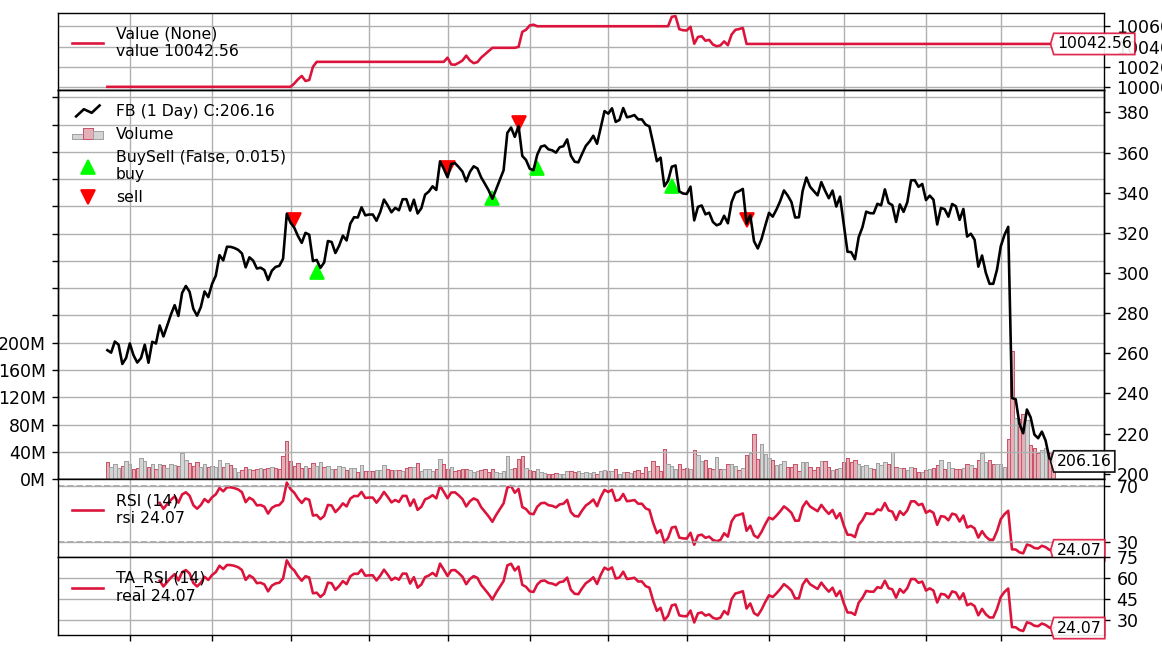

[[<Figure size 640x480 with 5 Axes>]]

In [6]:
cerebro.plot(iplot=True)